In [1]:
import igraph
import random 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
### helper methods ###
def drange(start, stop, step):
    """range the supports floats"""
    r = start
    while r < stop:
        yield round(r, len(str(step)))
        r += step
        
def errors(true, predicted):
    return (true != predicted).sum()

def plot_images(images):
    fig = plt.figure()
    for idx, fn in enumerate(images):
        a = fig.add_subplot(1, len(images), idx+1)
        plt.imshow(fn, cmap=cm.gray)
        plt.axis('off')

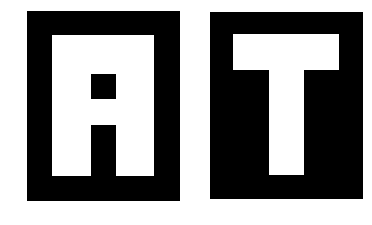

In [3]:
image_a = np.array(
        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]])

image_t = np.array(
        [[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [ 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [ 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [ 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
         [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]])

plot_images([image_a, image_t])

In [4]:
def corrupt_image(img, p=0.15):
    '''
    @params: 
    img (list of lists): this is an input "image" represented as a binary matrix
    p (float): each element with probablity p will be corrupted (flipped)
    
    @returns
    img_copy (list of lists): binary matrix that has been corrupted
    '''
    img_copy = img.copy()
    for idx, row in enumerate(img_copy):
        for pixel_idx, pixel in enumerate(row):
            if random.random() < p:
                if pixel:
                    img_copy[idx][pixel_idx] = 0
                else:
                    img_copy[idx][pixel_idx] = 1
    return img_copy

In [5]:
def create_graph(img, K=1, R=0.5):
    max_num = len(img)*len(img[0])
    s,t = max_num, max_num + 1
    edge_list = []
    weights   = []
    for r_idx, row in enumerate(img):
        for idx, pixel in enumerate(row):
            px_id = (r_idx*len(row)) + idx
            
            #add edges to each elements neighbors
            
            #add edge to cell to the left
            if px_id: #!= 0
                edge_list.append((px_id -1, px_id))
                weights.append( K )
            #add edge to cell to the right
            if px_id != len(row) -1: #last pixel
                edge_list.append((px_id +1, px_id))
                weights.append( K )
            #add edge to cell to the above
            if r_idx: #!= 0
                edge_list.append((px_id - len(row), px_id))
                weights.append( K )
            #add edge to cell to the below
            if r_idx != len(img) -1: #last row
                edge_list.append((px_id + len(row), px_id))
                weights.append( K )
            #add an edge to either s (source) or t (sink)
            if pixel == 0:
                edge_list.append((px_id, s))
                weights.append( R )
            else: #pixel == 1
                edge_list.append((px_id, t))
                weights.append( R )
    return edge_list, weights, s, t

In [6]:
def recover(noisy, K=0, R=1):
    """
    @params
    noisy (list of lists): binary matrix (img) that has been corrupted
    K (float): penalty for having a bad edge 
    R (float): penalty for flipping a bit
    
    @returns
    recovered (list of lists): recovered binary matrix ("image")
    """
    edge_list, weights, s, t = create_graph(noisy, K=K, R=R)
    g = igraph.Graph(edge_list)
    output = g.maxflow(s, t, weights)
    recovered = np.array(output.membership[:-2]).reshape(noisy.shape)
    return recovered

In [7]:
#parameter search
corrupted = [corrupt_image(image_a) for _ in range(10)]
m = 1000
for x in drange(0, 5, 0.5):
    for y in drange(0, 5, 0.5):

        b = sum([errors(image_a, recover(n, x, y)) for n in corrupted])
        if b < m:
            best = (b, x, y)
            m = b
print(best)
error, selected_K, selected_R = best

(153, 1.0, 3.5)


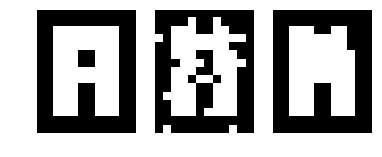

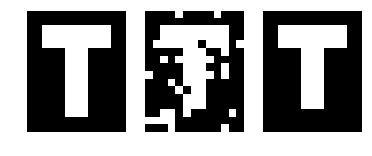

In [8]:
c_a = corrupt_image(image_a)
c_t = corrupt_image(image_t)

plot_images((image_a, c_a, recover(c_a, selected_K, selected_R)))
plot_images((image_t, c_t, recover(c_t, selected_K, selected_R)))

In [9]:
print("element-wise errors in corrupted image: {0}\nelement-wise errors in recovered image: {1}".format(errors(image_a, c_a), errors(image_a, recover(c_a, selected_K, selected_R))))

element-wise errors in corrupted image: 19
element-wise errors in recovered image: 9


In [10]:
#MNIST dataset from Kaggle (found at https://www.kaggle.com/c/digit-recognizer/data)
import pandas as pd
df = pd.read_csv("./train.csv")
df.drop('label', inplace=True, axis=1)

In [11]:
#parameter search
images           = [np.array(df.iloc[x]).reshape(28, 28).astype(bool) for x in range(10)]
corrupted_images = [corrupt_image(img) for img in images] 
m = 1000
for x in drange(0, 5, 0.25):
    for y in drange(0, 5, 0.25):
        b = sum([errors(i, recover(c, x, y)) for (i, c) in zip(images, corrupted_images)])
        if b < m:
            best = (b, x, y)
            m = b
print(best)
error, selected_K, selected_R = best

(205, 0.5, 1.75)


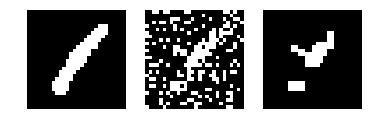

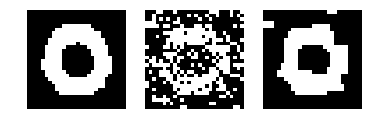

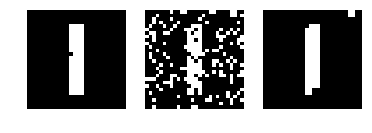

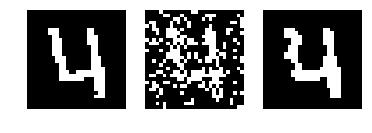

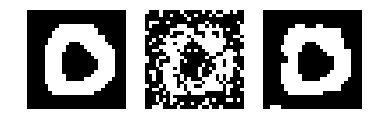

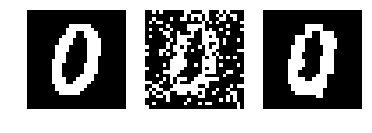

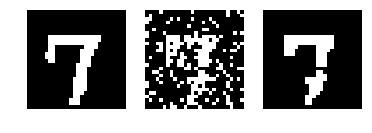

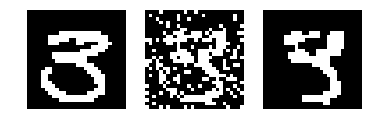

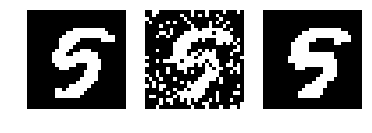

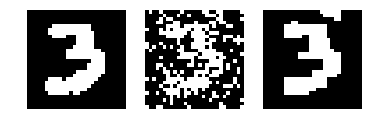

In [12]:
for x in range(10):
    orginal   = np.array(df.iloc[x]).reshape(28, 28).astype(bool)
    corrupted = corrupt_image(orginal, p=0.2)
    recovered = recover(corrupted, selected_K, selected_R)
    plot_images( [orginal, corrupted, recovered] )